<a href="https://colab.research.google.com/github/fridaruh/haleytek_workshop/blob/master/NLP/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vader Sentiment

vaderSentiment is a popular Python library for performing sentiment analysis. The name "VADER" is an acronym for Valence Aware Dictionary and sEntiment Reasoner. This library is specifically designed for social media sentiment analysis, but it's also quite effective for other types of text.

Here's some more detail about vaderSentiment:

- **Lexicon and Rule-Based:** vaderSentiment is a lexicon and rule-based 
 sentiment analysis tool. This means it uses a set of manually defined words (the lexicon) along with a series of grammatical and syntactical rules to determine sentiment.

- **Valence Score:** It doesn't just identify the sentiment as positive or negative. Instead, it provides a "valence" score which is a numerical score of the sentiment intensity. This score ranges from -1 (most negative) to +1 (most positive).

- **Accounting for Context:** What makes vaderSentiment unique is that it doesn't just look at individual words in isolation. Instead, it also takes into account the context of words, including the impact of intensifiers (like "very") and diminishers (like "kind of").

- **Handling of Emoticons, Slang and Emojis:** It's designed to understand social media text, and so it's able to understand things like emoticons (like ":)") for happy), internet slang (like "lol"), and capitalization intensity (like "GREAT!!").

- **Ease of Use:** One of the reasons vaderSentiment is so popular is because of how easy it is to use. You don't need to train any models or provide any training data. Instead, you just install the library, and it's ready to go.

More information: https://vadersentiment.readthedocs.io/en/latest/

# Tweepy

Tweepy is an easy-to-use Python library for accessing the Twitter API, which you can use to scrape tweets from Twitter, among other things. The Tweepy library simplifies the process of working with Twitter's API and allows users to make API calls in a Pythonic way.

Here's a brief overview of some of the key features and uses of Tweepy:

- **Tweet Extraction:** Tweepy can be used to extract tweets from the Twitter API based on certain criteria such as keyword, location, date, and user.

- **Posting Tweets:** With Tweepy, you can automate posting tweets on Twitter. You can also reply to tweets, like tweets, and retweet using Tweepy.

- **Streaming Tweets:** Tweepy provides a convenient interface to Twitter's Streaming API, which allows you to filter and consume new tweets in real-time.

- **User Details:** Tweepy can extract details about a Twitter user, such as the user's tweets, followers, following, likes, etc.

- **Other Twitter API Functionality:** In addition to the above, Tweepy also provides support for direct messages, user authentication, and other functionalities provided by the Twitter API.

More information: https://docs.tweepy.org/en/stable/

# Instalation

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
import tweepy
import pandas as pd
import seaborn as sns

## Credentials

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = 'df.to_csv('fomento_autoempleo.csv') #Exportar la tabla'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(auth)

# Tweet extraction

How to get started with the twitter API: https://developer.twitter.com/en/docs/twitter-api/getting-started/getting-access-to-the-twitter-api

In [ ]:
tweet_user = []
tweet_time = []
tweet_string = []

for tweet in tweepy.Cursor(api.search_tweets, q='volvo', count=1000).items(1000):
  if (not tweet.retweeted) and ('RT @' not in tweet.text):
    if tweet.lang == 'en': #we can change the language here
      tweet_user.append(tweet.user.name)
      tweet_time.append(tweet.created_at)
      tweet_string.append(tweet.text)

df = pd.DataFrame({'name': tweet_user, 'time':tweet_time, 'tweet':tweet_string})

In [ ]:
df

,name,time,tweet
0,Zamzam Auto Co.,2023-05-30 04:06:46+00:00,#Zamzamauto.com#Volvo#TractorUnit#FH12(500)#4x...
1,G Eswari,2023-05-30 04:06:11+00:00,Volvo EX90 Twin Motor Performance Electric Car...
2,Zamzam Auto Co.,2023-05-30 04:06:04+00:00,#Zamzamauto.com#Volvo#TractorUnit#FH12(500)#4x...
3,G Eswari,2023-05-30 04:05:52+00:00,"Volvo EX90 Twin Motor Electric Car - Price, Ot..."
4,Zamzam Auto Co.,2023-05-30 04:05:26+00:00,#Zamzamauto.com#Volvo#TractorUnit#FH12(500)#4x...
...,...,...,...
301,Chris Union Jack,2023-05-29 14:37:57+00:00,@VolvoCarUK xc40 diesel £375 per month \n\nVol...
302,Kumbi-M on Cars,2023-05-29 14:33:49+00:00,This is the Volvo C40 Recharge. Completely imp...
303,北の傍観 日ハム 江越ファン,2023-05-29 14:32:10+00:00,@Volvo_to_gohan (T . T)(T . T)(T . T)(T . T)(T...
304,Elizabeth K Chadwell,2023-05-29 14:29:50+00:00,@elonmusk as a Volvo hybrid owner I’d love to ...


In [ ]:
df.to_csv('volvo_tweets.csv') #Export table

# Read Dataset

In [ ]:
df = pd.read_csv('/content/nike_tweets.csv')

In [ ]:
analyser.polarity_scores("I feel so tired") #Explain the weights to each category

{'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'compound': -0.5777}

This function creates a column that tells me if the comment is positive, negative or neutral

In [ ]:
def sentiment_analyzer_scores(tweet):
  score = analyser.polarity_scores(tweet)
  comp = score['compound']
  if comp >= 0.05:
    return 1
  elif (comp > -0.05) and (comp<0.05):
    return 0
  else:
    return -1

In [ ]:
df['sentiment'] = df['tweet'].apply(lambda x: sentiment_analyzer_scores(x))

In [ ]:
df.sample(5)

,name,time,tweet,sentiment
4581,AJacksonTV,Fri Sep 07 01:20:29 +0000 2018,For #Orlando friends 🤣 #justdoit ✔️ https://t....,1
2050,MisterAndersonK,Fri Sep 07 10:58:48 +0000 2018,@Nike was thinking about being on the right si...,0
3388,El_Rico_Suave10,Fri Sep 07 03:28:51 +0000 2018,I can’t wait to buy all my friends and family ...,1
284,SteveBrant,Fri Sep 07 15:44:02 +0000 2018,"@AlterNet Why focus on ""wackiness""? Trump is a...",1
1545,beastmodewaller,Fri Sep 07 12:26:48 +0000 2018,Goodmorning 🌎. Its Friday!!!! #restday #goodmo...,1


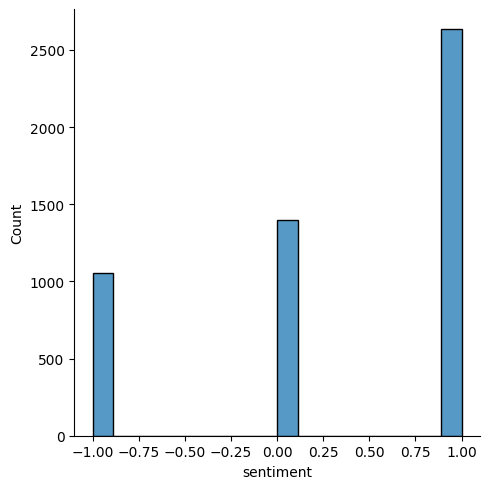

In [ ]:
sns.displot(df, x='sentiment')

In [ ]:
data = df['tweet'].tolist()

# Natural Language Processing

We load pattern of abbreviations, hyphens and other figures

In [ ]:
pattern = r'''(?x)                  # Flag to start verbose mode
              (?:[A-Z]\.)+          # Matches abbreviations like U.S.A.
              | \w+(?:-\w+)*        # Matches words that can have an internal hyphen
              | \$?\d+(?:\.\d+)?%?  # Match money or percentages like $15.5 or 100%
              | \.\.\.              # Matches an ellipsis
              | [][.,;"'?():-_`]    # Match punctuation marks
'''

## NLTK

More information: https://www.nltk.org/

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text = []

for x in range(0,len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)

Returns a single list the list of lists that were the tweets

In [ ]:
flatten = [w for l in text for w in l]

We import the punctuation marks to later remove them

In [ ]:
import string
punctuations = list(string.punctuation)

We import a list of "stopwords" or also called prepositions

In [ ]:
nltk.download('stopwords')
newStopWords = list(nltk.corpus.stopwords.words('english')) #We can change the language

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_2 = [w for w in flatten if w not in newStopWords]
df_3 = [w for w in df_2 if w not in punctuations]

**Frequency**

In [ ]:
fw = nltk.FreqDist(df_3)

In [ ]:
fw.most_common(25)

[('justdoit', 5150),
 ('https', 3228),
 ('co', 3228),
 ('nike', 2889),
 ('...', 689),
 ('kaepernick7', 500),
 ('realdonaldtrump', 412),
 ('kaepernick', 372),
 ('crazy', 330),
 ('believe', 312),
 ('commercial', 297),
 ('even', 293),
 ('like', 270),
 ('something', 258),
 ('one', 251),
 ('amp', 244),
 ('ad', 243),
 ('new', 240),
 ('nfl', 236),
 ('people', 231),
 ('love', 222),
 ('colinkaepernick', 210),
 ('get', 207),
 ('ask', 207),
 ('everything', 206)]

The next line is optional and is to remove some words that you want to omit

In [ ]:
omit_words = ['justdoit','nike','co','https','...'] #The list of words that you want to quit
df_4 = [w for w in df_3 if w not in omit_words]

In [ ]:
fw = nltk.FreqDist(df_4)

In [ ]:
fw.most_common(50)

[('kaepernick7', 500),
 ('realdonaldtrump', 412),
 ('kaepernick', 372),
 ('crazy', 330),
 ('believe', 312),
 ('commercial', 297),
 ('even', 293),
 ('like', 270),
 ('something', 258),
 ('one', 251),
 ('amp', 244),
 ('ad', 243),
 ('new', 240),
 ('nfl', 236),
 ('people', 231),
 ('love', 222),
 ('colinkaepernick', 210),
 ('get', 207),
 ('ask', 207),
 ('everything', 206),
 ('means', 187),
 ('colin', 175),
 ('enough', 170),
 ('campaign', 168),
 ('go', 166),
 ('dreams', 164),
 ('right', 161),
 ('sacrificing', 146),
 ('know', 145),
 ('good', 142),
 ('time', 141),
 ('takeaknee', 138),
 ('thinking', 136),
 ('make', 136),
 ('great', 129),
 ('shoes', 126),
 ('would', 126),
 ('stand', 124),
 ('think', 119),
 ('want', 119),
 ('best', 116),
 ('support', 113),
 ('thank', 112),
 ('today', 111),
 ('need', 110),
 ('serenawilliams', 110),
 ('see', 107),
 ('life', 106),
 ('work', 106),
 ('way', 104)]

# Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

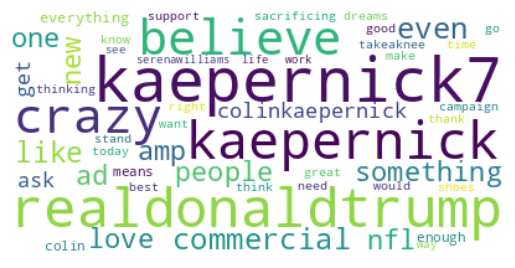

In [ ]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=50).fit_words(fw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()